In [1]:
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import keras

Using plaidml.keras.backend backend.


In [2]:
input_shape = (150, 150, 3)

In [3]:
import import_ipynb
from Dataset_utils import get_imgs_labels, get_labels_enc

importing Jupyter notebook from Dataset_utils.ipynb


In [4]:
train_imgs, _, validation_imgs, _ = get_imgs_labels()
train_labels_enc, validation_labels_enc = get_labels_enc()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [6]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

INFO:plaidml:Opening device "opencl_amd_hainan.0"


In [7]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/10
100/100 [==============================] - 1540s 15s/step - loss: 0.5158 - acc: 0.7317 - val_loss: 0.1863 - val_acc: 0.9230
Epoch 2/10
100/100 [==============================] - 1536s 15s/step - loss: 0.3092 - acc: 0.8673 - val_loss: 0.2325 - val_acc: 0.9100
Epoch 3/10
100/100 [==============================] - 1537s 15s/step - loss: 0.2495 - acc: 0.8917 - val_loss: 0.1066 - val_acc: 0.9570
Epoch 4/10
100/100 [==============================] - 1535s 15s/step - loss: 0.2177 - acc: 0.9143 - val_loss: 0.1277 - val_acc: 0.9490
Epoch 5/10
100/100 [==============================] - 1534s 15s/step - loss: 0.1871 - acc: 0.9220 - val_loss: 0.0796 - val_acc: 0.9680
Epoch 6/10
100/100 [==============================] - 1534s 15s/step - loss: 0.1767 - acc: 0.9273 - val_loss: 0.0868 - val_acc: 0.9620
Epoch 7/10
100/100 [==============================] - 1537s 15s/step - loss: 0.1581 - acc: 0.9373 - val_loss: 0.0913 - val_acc: 0.9590
Epoch 8/10
100/100 [==============================] - 1

In [11]:
# save model
import os

if(not os.path.exists('saved_models')):
    os.mkdir('saved_models')
model.save('saved_models/pre_trained_with_augmentation_tlearn.h5')

In [12]:
import pickle
import os

if(not os.path.exists('saved_history')):
    os.mkdir('saved_history')
f = open('saved_history/pre_trained_with_augmentation_tlearn.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [15]:
# load history
import pickle

file = 'saved_history/pre_trained_with_augmentation_tlearn.pckl'
f = open(file, 'rb')
hist = pickle.load(f)
f.close()

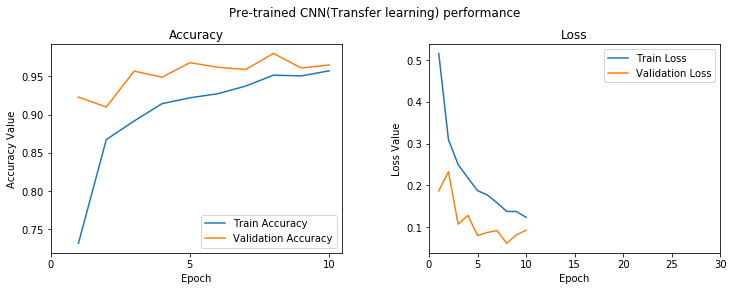

In [16]:
# plot graph
import import_ipynb
from model_summary import plot_graph

performance = 'Pre-trained CNN(Transfer learning) performance'
plot_graph(performance, hist, 10)